In [2]:
from qiskit import *
from matplotlib import *
#pip install pylatexenc
%matplotlib inline


In [3]:
circuit=QuantumCircuit(2,1)  # (qbit,cbit) cbit=1->  classicalbit  to store output  same as openQASM

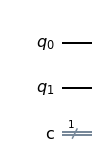

In [4]:
# just to see 
circuit.draw(output='mpl')   # mpl gives better look and feel from matplotlib

In [5]:
# applying pauli-x gate  to get reverse state of qubit like not gate

circuit.x(0)

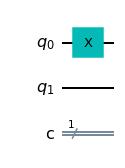

In [6]:
circuit.draw(output='mpl')  # gate applied to q0

In [7]:
# to measure qbuit and store in classical bit cbit

circuit.measure([0],[0])  # (qbit,cbit)

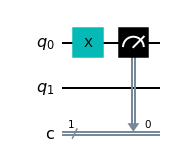

In [8]:
circuit.draw(output='mpl') # now we can see measure symbol is applied q0 x gate o/p stored in c

In [11]:
# now connect backend quantum say  ibm simulator

Aer.aer.backends() # list out all simulator names

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [12]:
# pick simulator name ex<qasm_simulator> connect to this backend
simulator=Aer.aer.get_backend('qasm_simulator')

In [24]:
# To run/execute this code  use 'execute'cmd  and store results  .result()
#execute (circuit or experient name given,backend, shots )
# by default 1024 shots circuit runs  from this we can get count like how many times our qbit is inrequired state
job_result=execute(experiments=circuit,
                  backend=simulator,
                  shots=1000).result()

In [25]:
# Detailed result  output
job_result

Result(backend_name='qasm_simulator', backend_version='0.10.4', qobj_id='3dcff4df-89fb-4ff7-84e2-55623213f2b0', job_id='1a599f60-8fc6-478f-9474-09b92164df39', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 1000}), header=QobjExperimentHeader(clbit_labels=[['c', 0]], creg_sizes=[['c', 1]], global_phase=0.0, memory_slots=1, metadata={}, n_qubits=2, name='circuit-0', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=2239903155, metadata={'parallel_state_update': 8, 'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 1, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'stabilizer', 'active_input_qubits': [0], 'num_clbits': 1, 'input_qubit_map': [[0, 0]], 'fusion': {'enabled': False}}, time_taken=0.00368169)], date=2022-04-23T12:19:35.119793, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backen

In [26]:
# to get specific extract output like count of qbits
job_result.get_counts()

{'1': 1000}

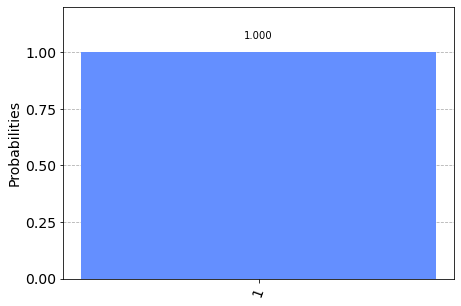

In [27]:
# to visualize in histogram like ibm composer
from qiskit.visualization import plot_histogram
plot_histogram(job_result.get_counts())